In [127]:
# https://youtu.be/YEBfamv-_do
# https://youtu.be/wXB-V_Keiu8

# https://www.wikiwand.com/en/RSA_(cryptosystem)
# https://bigideascryptok12.bitbucket.io/
# https://math.stackexchange.com/questions/20157/rsa-in-plain-english
# http://web.math.unifi.it/users/piochi/MATERIALI_OL/aritfinite-crittograf/crittologia.htm


In [350]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
from tabulate import tabulate

In [351]:
from ml import *

In [439]:
M = Mod(8)
M.prodotto()

┌─────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [2] │ [2]   │ [4]   │ [6]   │ [0]   │ [2]   │ [4]   │ [6]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [6]   │ [1]   │ [4]   │ [7]   │ [2]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [4] │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [2]   │ [7]   │ [4]   │ [1]   │ [6]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [6] │ [6]   │ [4]   │ [2]   │ [0]   │ [6]   │ [4]   │ [2]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [6]   │ [5]   │ [4]   │ 

In [440]:
Mod(8).prodotto_coprimi()

┌─────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [1]   │ [7]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [7]   │ [1]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [5]   │ [3]   │ [1]   │
└─────┴───────┴───────┴───────┴───────┘


In [441]:
Mod(14).generatori()

┌──────┬──────┬──────┬──────┬──────┬─────┬─────┐
│ **   │ 1    │ 2    │ 3    │ 4    │ 5   │ 6   │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [1]  │ [1]  │      │      │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [3]  │ [3]  │ [9]  │ [13] │ [11] │ [5] │ [1] │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [5]  │ [5]  │ [11] │ [13] │ [9]  │ [3] │ [1] │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [9]  │ [9]  │ [11] │ [1]  │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [11] │ [11] │ [9]  │ [1]  │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [13] │ [13] │ [1]  │      │      │     │     │
└──────┴──────┴──────┴──────┴──────┴─────┴─────┘


In [442]:
def summ(msg, key):
  key = key * (len(msg) // len(key) + 1)
  return ''.join([s(a, b) for a, b in zip(msg, key)])

def s(a, b):
  if not (a.isalpha() and a.isascii()): return a
  return chr((ord(a) - ord('a') + ord(b) - ord('a')) % 26 + ord('a'))

def inv(key):
  return ''.join(chr((ord('a') - ord(a)) % 26 + ord('a')) for a in key)

summ(summ('ciao mamma', 'mamma'), inv('mamma'))

'ciao mamma'

In [444]:
from urllib.request import urlopen
from collections import Counter

with urlopen('https://www.gutenberg.org/cache/epub/45334/pg45334.txt') as inf:
  text = inf.read().decode('utf-8-sig')

In [445]:
def freqs(text):
  cnt = Counter()
  cnt.update([c.lower() for c in text if c.isalpha()])
  return [cnt[l] / cnt.total() for l in AZ]

In [446]:
def cesar(msg, k):
  A = ord('a')
  return ''.join(chr(A + (ord(c) - A + k) % 26) if c.isalpha() and c.isascii() else c for c in msg.lower())

In [447]:
msg = """
Tutt'e due si volsero a chi ne sapeva più di loro, e da cui aspettavano uno
schiarimento, il quale non poteva essere che doloroso: tutt'e due,
lasciando travedere, in mezzo al dolore, e con l'amore diverso che
ognun d'essi portava a Lucia
"""

In [448]:
print(cesar(msg, 2))


vwvv'g fwg uk xqnugtq c ejk pg ucrgxc rkù fk nqtq, g fc ewk curgvvcxcpq wpq
uejkctkogpvq, kn swcng pqp rqvgxc guugtg ejg fqnqtquq: vwvv'g fwg,
ncuekcpfq vtcxgfgtg, kp ogbbq cn fqnqtg, g eqp n'coqtg fkxgtuq ejg
qipwp f'guuk rqtvcxc c nwekc



In [449]:
print(cesar(cesar(msg, 2), 24))


tutt'e due si volsero a chi ne sapeva più di loro, e da cui aspettavano uno
schiarimento, il quale non poteva essere che doloroso: tutt'e due,
lasciando travedere, in mezzo al dolore, e con l'amore diverso che
ognun d'essi portava a lucia



In [450]:
import string 

AZ =string.ascii_letters[:26]

<BarContainer object of 26 artists>

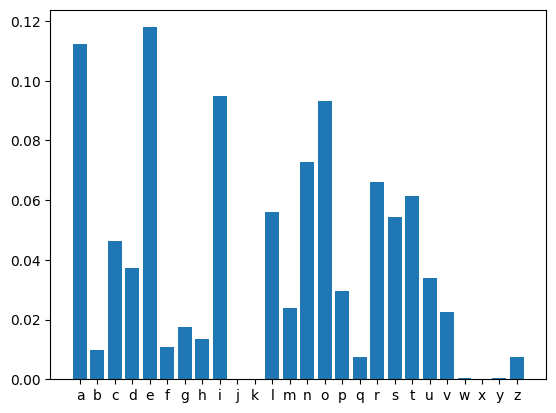

In [451]:
import matplotlib.pyplot as plt

plt.bar(list(AZ), freqs(text))

<BarContainer object of 26 artists>

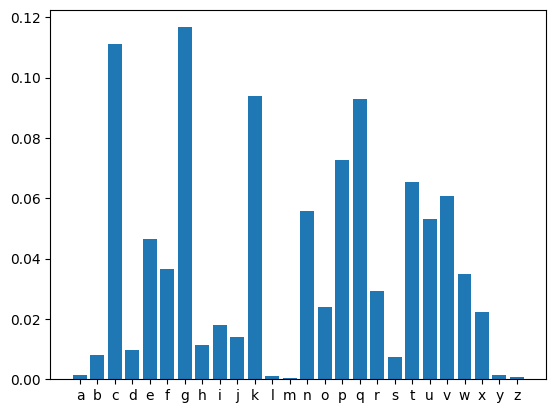

In [452]:
plt.bar(list(AZ), freqs(summ(text, 'c')))

<BarContainer object of 26 artists>

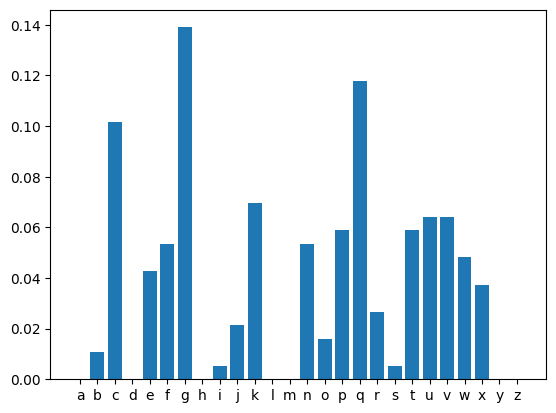

In [453]:
plt.bar(list(AZ), freqs(cesar(msg, 2)))

In [454]:
from time import thread_time_ns

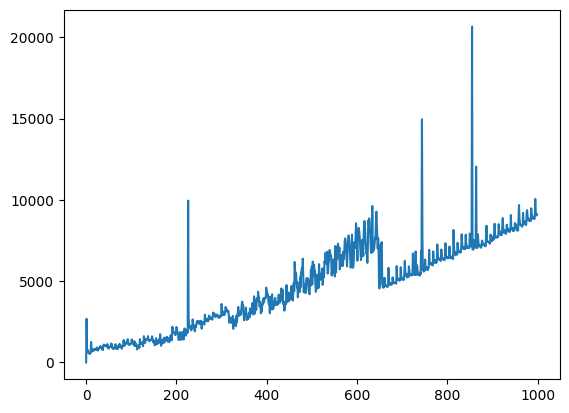

In [ ]:
T = [0]
n = 1
for i in range(1, 1_000):
  t0 = thread_time_ns()
  n * (n - 1)#list(factors(n))
  n *= 10
  T.append(thread_time_ns() - t0)

plt.plot(T)

In [ ]:
N = list(range(1, 1000))
p = ['r' if is_prime(n) else 'b' for n in N]


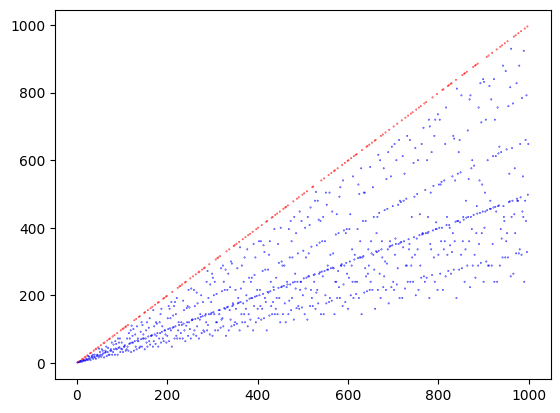

In [ ]:
plt.scatter(N, [φ(n) for n in N], s = .1, color = p)

'ciao mamma'

In [455]:
p = 97
g = 41

#g = 3
#p = 17


len(set(expm(g, i, p) for i in range(p-1)))

2962

In [497]:
p, g = 2963, 51

M = Mod(p)
len(M[g].potenze()) == p - 1

True

In [498]:
# Diffie-Hellman

a, b = 123, 345
print(M[g] ** a, M[g] ** b)
M[2149] ** b == M[2940] ** a

[2149] [2940]


True

In [499]:
p, q = 55202166624234742076825422018198552545568721350927, 43045972142075202331028535612422134545369845034403
e = 65537

In [500]:
n = p * q
t = (p - 1) * (q - 1)

In [501]:
d = (1 / Mod(t)[e]).n
d

701154365630284037290881701138012383299504419581543080721910924221824588942701573338487759909677721

In [502]:
prv = (e, n)
pub = (d, n)

In [516]:
m = to_number('ciao mamma')
m

567540152263587169583186817268104272407833878560

In [517]:
gcd(m, n)

1

In [518]:
def rsa(m, k):
  e, n = k
  M = Mod(n)
  return (M[m] ** e).rappresentante()

In [519]:
c = rsa(m, prv)
c

1830413722591897384203508937694088315077662663481361096498240303183281117600312613156074632686463736

In [520]:
mp = rsa(c, pub)
mp

567540152263587169583186817268104272407833878560

In [521]:
from_number(mp)

'ciao mamma'